In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
'''trainEvents is the list of all sound events across all training clips.
evalEvents is the list of all sound events across all eval clips.
displayNames is a table for Google's labeling scheme.
See https://research.google.com/audioset/download.html for more details.
'''

trainEvents = pd.read_csv("../data/audioset_train_strong.tsv", sep="\t")
evalUnframed = pd.read_csv("../data/audioset_eval_strong.tsv", sep="\t")
evalEvents = pd.read_csv("../data/audioset_eval_strong_framed_posneg.tsv", sep="\t")
displayNames = pd.read_csv("../data/mid_to_display_name.tsv", sep="\t",header=None)

trainEvents.head()

,segment_id,start_time_seconds,end_time_seconds,label
0,b0RFKhbpFJA_30000,0.000,10.000,/m/03m9d0z
1,b0RFKhbpFJA_30000,4.753,5.720,/m/05zppz
2,b0RFKhbpFJA_30000,0.000,10.000,/m/07pjwq1
3,b0RFKhbpFJA_30000,6.899,7.010,/m/07qjznt
4,b0RFKhbpFJA_30000,8.534,9.156,/t/dd00092


In [3]:
# For EDA on this part, need to see how well represented each label is.
# Make a bar graph where each bar height = # times a certain event is found.

In [4]:
evalEvents.head()

,segment_id,start_time_seconds,end_time_seconds,label,present
0,YxlGt805lTA_30000,0.0,0.96,/m/02zsn,NOT_PRESENT
1,YxlGt805lTA_30000,0.0,0.96,/m/04qvtq,NOT_PRESENT
2,YxlGt805lTA_30000,0.0,0.96,/m/04rlf,PRESENT
3,YxlGt805lTA_30000,0.0,0.96,/m/07rgkc5,NOT_PRESENT
4,YxlGt805lTA_30000,0.0,0.96,/m/0jbk,NOT_PRESENT


In [19]:
first = displayNames.columns[0]
second = displayNames.columns[1]

for i in range(displayNames.shape[0]):
    print(displayNames.iloc[i][second],displayNames.iloc[i][first])

Kettle whistle /g/11b630rrvh
Firecracker /g/122z_qxw
Wild animals /m/01280g
Motor vehicle (road) /m/012f08
Ambulance (siren) /m/012n7d
Fire engine, fire truck (siren) /m/012ndj
Toothbrush /m/012xff
Sink (filling or washing) /m/0130jx
Aircraft engine /m/014yck
Explosion /m/014zdl
Change ringing (campanology) /m/0150b9
Dial tone /m/015jpf
Singing /m/015lz1
Bird /m/015p6
Digestive /m/0160x5
Washing machine /m/0174k2
Cart /m/018p4k
Basketball bounce /m/018w8
Sonic boom /m/0193bn
Subway, metro, underground /m/0195fx
Bicycle, tricycle /m/0199g
Boat, Water vehicle /m/019jd
Sawing /m/01b82r
Reverberation /m/01b9nn
Cough /m/01b_21
Bus /m/01bjv
Mantra /m/01c194
Drill /m/01d380
Snoring /m/01d3sd
Gull, seagull /m/01dwxx
Railroad car, train wagon /m/01g50p
Stomach rumble /m/01g90h
Bee, wasp, etc. /m/01h3n
Engine knocking /m/01h82_
Conversation /m/01h8n0
Yak /m/01hhp3
Ringtone /m/01hnzm
Sneeze /m/01hsr_
Bathroom sounds /m/01j2bj
Studio recording /m/01j3j8
Laughter /m/01j3sz
Yawn /m/01j423
Chainsaw /

In [39]:
numbersOfEvents = displayNames.copy().set_index(displayNames.columns[0])
trainEvents.label.value_counts()
numbersOfEvents["number"] = trainEvents.label.value_counts()


#trainEvents.label.value_counts()
#numbersOfEvents = numbersOfEvents.sort_values("number")


totalTime = trainEvents.copy()
totalTime["time"] = totalTime["end_time_seconds"] - totalTime["start_time_seconds"]


numbersOfEvents["total_time"] = 0
for i in numbersOfEvents.index:
    numbersOfEvents.loc[i,"total_time"] = totalTime[totalTime.label==i].time.sum()
#totalTime[totalTime["label"]=="/m/03m9d0z"]

In [42]:
numbersOfEvents = numbersOfEvents.sort_values("total_time")

<Axes: xlabel='1'>

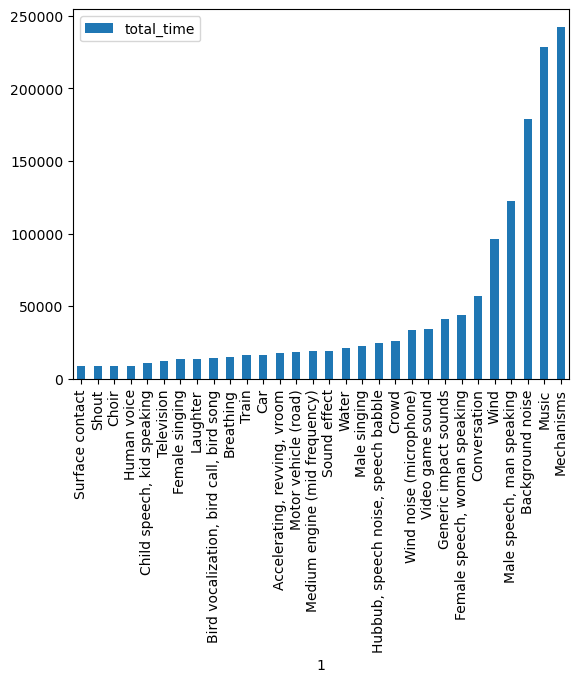

In [43]:
numbersOfEvents[-30:].plot.bar(x=displayNames.columns[1],y="total_time")

In [8]:
import tensorflow as tf

In [9]:
from os import listdir
from os.path import isfile, join
def get_filenames(mypath):
    return [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [10]:
'''
The dataset goes frame by frame, with a spectral analysis of each one's
(very short) snippet of sound.

The feature sets are individual .tfrecord files separated into folders.
Read THIS for a tutorial on building a pipeline to deal with them.
https://www.tensorflow.org/guide/data#consuming_tfrecord_data

Still trying to figure out how to wrangle this.
----------------------------------------------------------------------------------

This has been wrangled, I think. With the function defined above and the 
changes below, we can read our entire dataset into a TFRecordDataset.
Next step is to figure out how to make sense of those 8-bit audio features.
'''
#filenames = ["../data/audioset_v1_embeddings/bal_train/-n.tfrecord","../data/audioset_v1_embeddings/bal_train/--.tfrecord"]
filenames = ["../data/audioset_v1_embeddings/bal_train/" + i for i in get_filenames("../data/audioset_v1_embeddings/bal_train/")]
#print(filenames)
raw_dataset = tf.data.TFRecordDataset(filenames)

for raw_record in raw_dataset.take(3):
    example = tf.train.SequenceExample()
    example.ParseFromString(raw_record.numpy())
    print(example)

context {
  feature {
    key: "end_time_seconds"
    value {
      float_list {
        value: 40.0
      }
    }
  }
  feature {
    key: "labels"
    value {
      int64_list {
        value: 399
      }
    }
  }
  feature {
    key: "start_time_seconds"
    value {
      float_list {
        value: 30.0
      }
    }
  }
  feature {
    key: "video_id"
    value {
      bytes_list {
        value: "--cB2ZVjpnA"
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "audio_embedding"
    value {
      feature {
        bytes_list {
          value: "_z\223\016e0\235}\372\365j\2513~M\221\205%\265\237 \373\327\210\240\367\232+_\033\210`q=H\377J[\247j\003\230p\377\371a\334\3770\377\177\377*\030\211\251\226\340\000C\370\246:T\000\2177d\253\377|E\177\006\000\000+\000\377\207EO\323\261\321\272\342Mk\225\033\377\036\377\000\034\207\377\374o_\377\233\\C\343Na\000\377\000\000\333q\377\232m\177\271\000\272\000?\377\377\002\276\000"
        }
      }
      feature {
        bytes_list 

In [11]:
# Copied Ben's stuff just so I don't need to rerun the nice cell he's got going on right above this one.
# Thanks again for doing that part. The proto was a HUGE help in navigating the records. -Jacob
filenames = ["../data/audioset_v1_embeddings/bal_train/" + i for i in get_filenames("../data/audioset_v1_embeddings/bal_train/")]
raw_dataset = tf.data.TFRecordDataset(filenames)

# Accessing individual entries in each record.
# Once we have that, we can do some EDA on the features themselves.
for raw_record in raw_dataset.take(3):
    example = tf.train.SequenceExample()
    example.ParseFromString(raw_record.numpy())
    print(example.context.feature['video_id'].bytes_list.value[0]) # FINALLY FIGURED OUT HOW TO ACCESS INDIVIDUAL DATA ENTRIES!
    print(list(example.feature_lists.feature_list['audio_embedding'].feature[0].bytes_list.value[0])) # Took me a bit longer but I got this one too.

# As you can see, Python's built-in "list" command can convert a byte string into an array of the respective integers they represent!
# Not sure if we need to do this conversion for training, but it would make EDA a lot easier.

b'--cB2ZVjpnA'
[95, 122, 147, 14, 101, 48, 157, 125, 250, 245, 106, 169, 51, 126, 77, 145, 133, 37, 181, 159, 32, 251, 215, 136, 160, 247, 154, 43, 95, 27, 136, 96, 113, 61, 72, 255, 74, 91, 167, 106, 3, 152, 112, 255, 249, 97, 220, 255, 48, 255, 127, 255, 42, 24, 137, 169, 150, 224, 0, 67, 248, 166, 58, 84, 0, 143, 55, 100, 171, 255, 124, 69, 127, 6, 0, 0, 43, 0, 255, 135, 69, 79, 211, 177, 209, 186, 226, 77, 107, 149, 27, 255, 30, 255, 0, 28, 135, 255, 252, 111, 95, 255, 155, 92, 67, 227, 78, 97, 0, 255, 0, 0, 219, 113, 255, 154, 109, 127, 185, 0, 186, 0, 63, 255, 255, 2, 190, 0]
b'--PJHxphWEs'
[80, 181, 216, 164, 218, 123, 76, 108, 255, 57, 51, 149, 215, 69, 1, 202, 71, 115, 131, 0, 178, 165, 71, 138, 89, 132, 94, 124, 255, 225, 62, 30, 203, 173, 255, 231, 117, 187, 57, 70, 11, 216, 35, 242, 144, 154, 255, 0, 165, 227, 92, 0, 232, 218, 199, 255, 99, 41, 255, 10, 159, 109, 152, 96, 255, 168, 126, 145, 27, 193, 24, 161, 124, 0, 29, 38, 0, 130, 177, 162, 255, 255, 244, 128, 62, 107, 25

Coordinate 1 distribution (out of 128 coordinates)


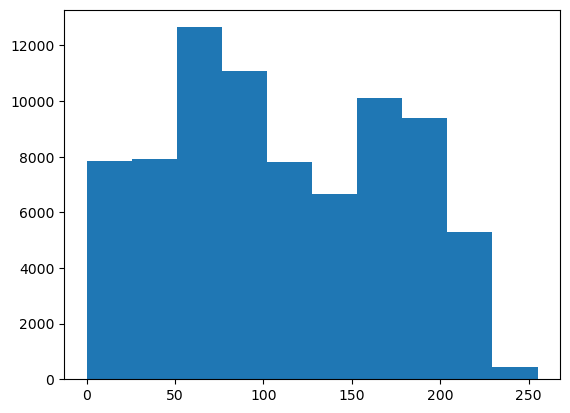

Coordinate 2 distribution (out of 128 coordinates)


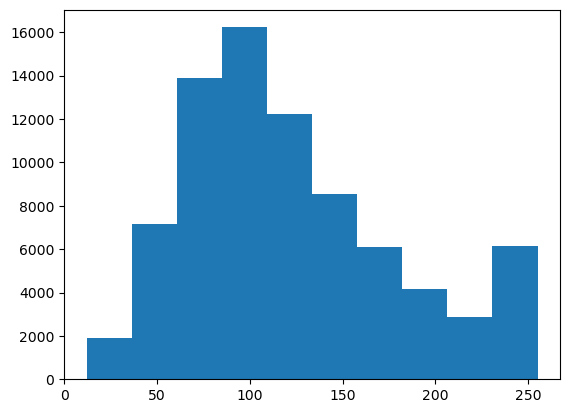

Coordinate 63 distribution (out of 128 coordinates)


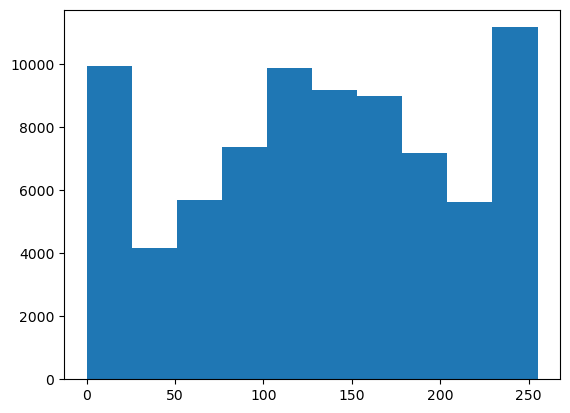

First two coordinates in a scatterplot


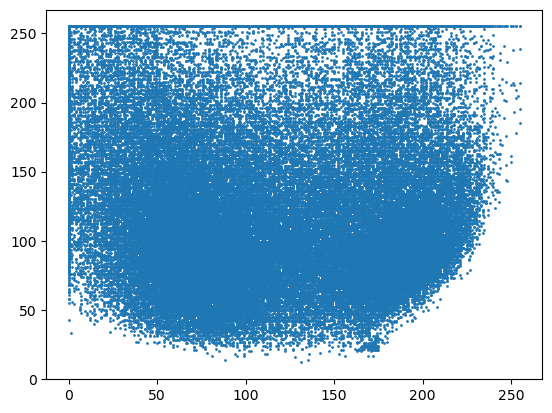

In [12]:
# Next, I'd like to do some EDA on some coordinates, just to see how these are distributed.

def coordinate_list(j):
    coordinates = []
    for raw_record in raw_dataset:
        example = tf.train.SequenceExample()
        example.ParseFromString(raw_record.numpy())
        for i in range(0,len(example.feature_lists.feature_list['audio_embedding'].feature)):
            coordinates.append(list(example.feature_lists.feature_list['audio_embedding'].feature[i].bytes_list.value[0])[j])
    return coordinates

first_coord = coordinate_list(0)
print('Coordinate 1 distribution (out of 128 coordinates)')
plt.figure()
plt.hist(first_coord)
plt.show()
second_coord = coordinate_list(1)
print('Coordinate 2 distribution (out of 128 coordinates)')
plt.figure()
plt.hist(second_coord)
plt.show()

extra_coordinates_to_analyze = [63]
for k in extra_coordinates_to_analyze:
    print('Coordinate ' + str(k) + ' distribution (out of 128 coordinates)')
    plt.figure()
    plt.hist(coordinate_list(k))
    plt.show()

# Also want a scatterplot comparing some of the coordinates.
print('First two coordinates in a scatterplot')
plt.figure()
plt.scatter(first_coord, second_coord, s=1)
plt.show()